# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

# Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

   1. Do the users spend more time on the new landing page than on the existing landing page?

   2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

   3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

   4. Is the time spent on the new page the same for the different language users?

# Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

   1. user_id - Unique user ID of the person visiting the website

   2. group - Whether the user belongs to the first group (control) or the second group (treatment)

   3. landing_page - Whether the landing page is new or old

   4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

   5. converted - Whether the user gets converted to a subscriber of the news portal or not

   6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [98]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [99]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# read the dataset
df = pd.read_csv('/content/drive/My Drive/Project 2/abtest.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [101]:
# read the dataset
df = pd.read_csv('/content/drive/My Drive/Project 2/abtest.csv')
# return the first 5 rows
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [102]:
# return the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


* The DataFrame has 6 colums as mentioned in the Data Dictionary



##Checking the shape of the dataset

In [103]:
# checking the shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


## Getting the statistical summary for the variables

In [104]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numerical columns in the data and 4 object type columns.

## Check for missing values

In [105]:
# checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the data.

## Check for duplicates

In [106]:
# Check for duplicates
duplicates = df.duplicated()

# Print the number of duplicates
print("Number of duplicates:", duplicates.sum())

# Print the duplicate rows
print("Duplicate rows:", df[duplicates])

Number of duplicates: 0
Duplicate rows: Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


* There are no duplicates in the data.

## Statistical summary of the dataset

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


* The user_id is a column consisting of unique user-ids.
* The mean engagement-time is 5.3778 hrs, while the median engagement-time is 5.415 hrs.

### Univariate Analysis

# Time spent on the page

Sample mean: 5.38


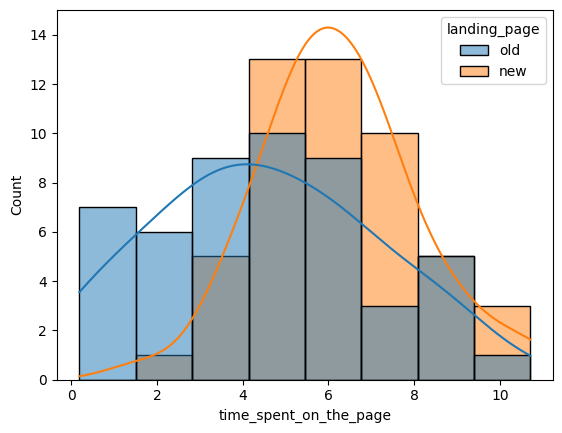

In [108]:
# Distribution of time_spent_on_the_page
print('Sample mean:', np.round(df.time_spent_on_the_page.mean(),2))
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', kde=True)
plt.show()

* The distribution of time spent on the page is similar for both landing pages. 
* The new landing page seems to have a slightly higher median time spent on the page.

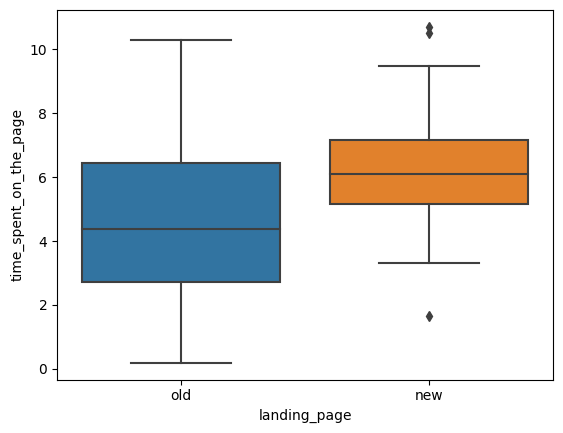

In [109]:
# Boxplot of time_spent_on_the_page by page
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

# Group

In [110]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

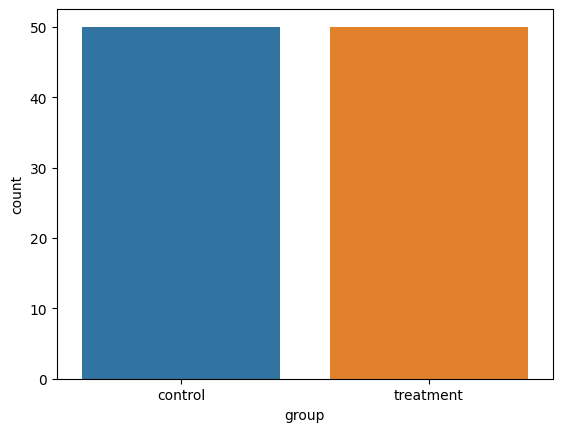

In [111]:
sns.countplot(data=df,x='group')
plt.show()

# Landing page

In [112]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

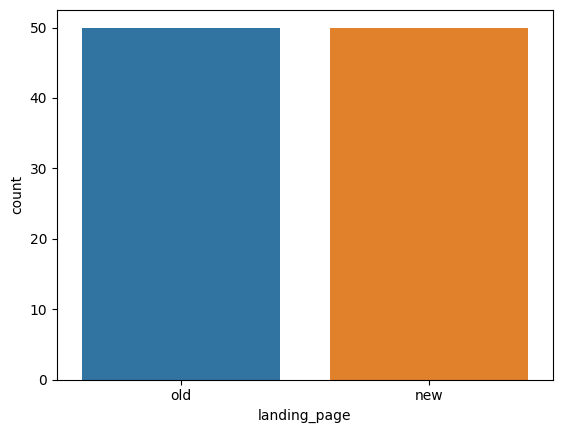

In [113]:
sns.countplot(data=df,x='landing_page')
plt.show()

# Converted

In [114]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

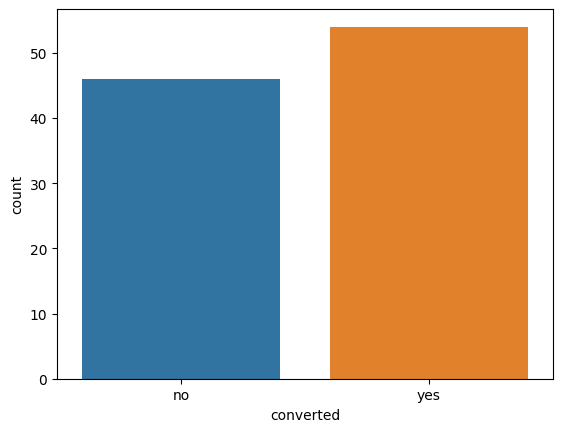

In [115]:
sns.countplot(data=df,x='converted')
plt.show()

# Language preferred

In [116]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

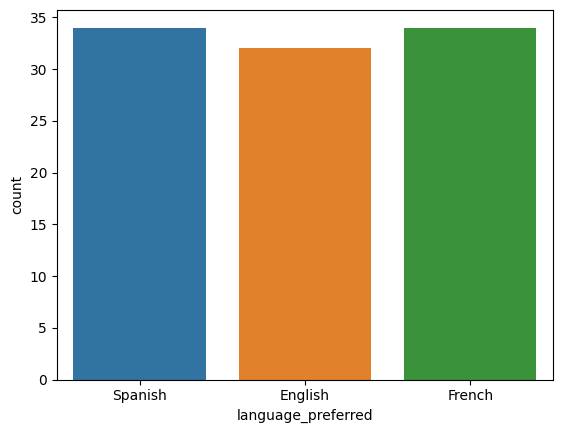

In [117]:
sns.countplot(data=df,x='language_preferred')
plt.show()

* Spanish, French are the most preferred languages.

* English is less.

### Bivariate Analysis

## Landing page vs Time spent on the page

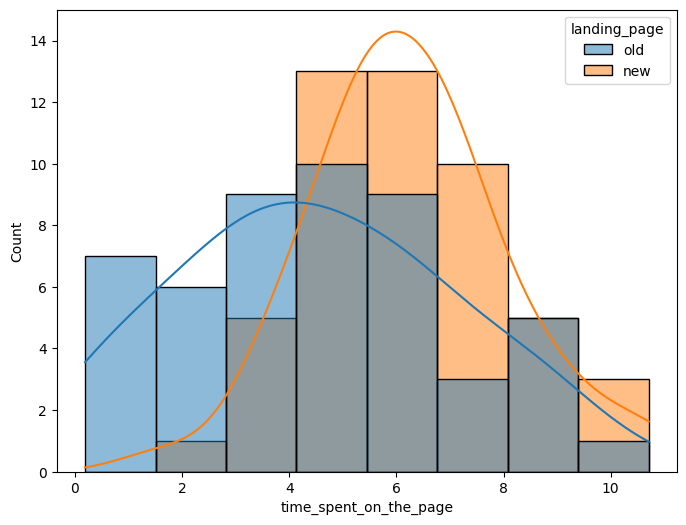

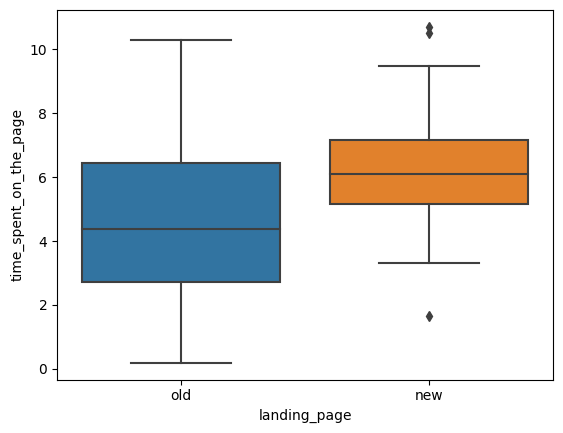

In [118]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', kde=True)
plt.show()
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

* The histplots shows the distribution of time spent on the page is similar for both landing pages but the new landing page seems to have a slightly higher median time spent on the page.
* The boxplot indicates users spend more time on the new landing than on the existing landing page.
* The median time spent on the new landing page is around 6 minutes while that of the old landing page is about 4.5 minutes

## Conversion status vs Time spent on the page

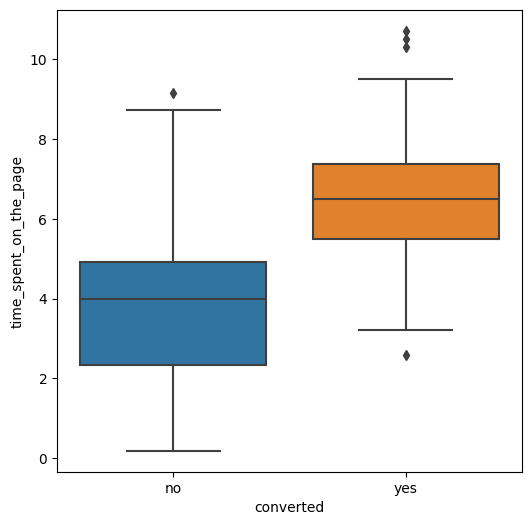

In [119]:
from pandas.core.dtypes.common import conversion
# the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(6, 6))
sns.boxplot(data = df, x ='converted', y = 'time_spent_on_the_page')
plt.show()

## Language preferred vs Time spent on the page


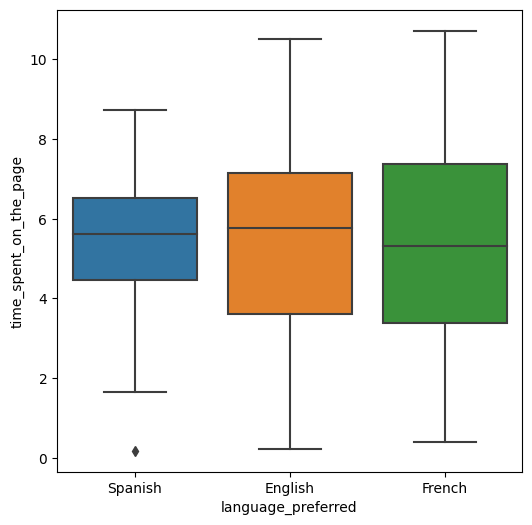

In [120]:
# the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(6, 6))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than on the existing page?

## Perform Visual Analysis



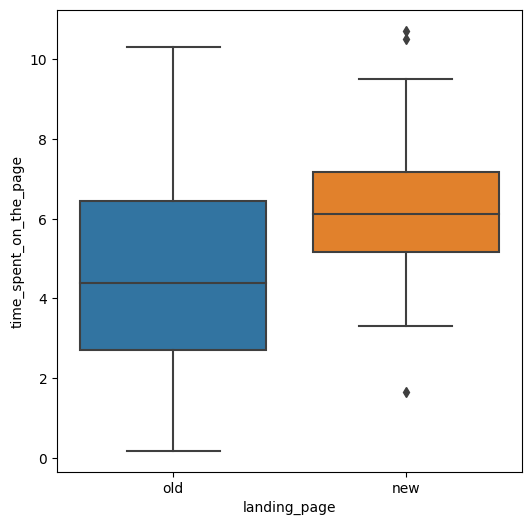

In [121]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(6,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: In the given experiment, the null hypothesis is no significant difference between the conversion rates of the old landing page and the new landing page. In other words, the null hypothesis assumes that the new landing page is not more effective than the old landing page in gathering new subscribers.

$H_a$: The alternative hypothesis suggests that there is a significant difference between the conversion rates of the old landing page and the new landing page. In this case, the alternative hypothesis suggests that the new landing page is more effective in gathering new subscribers than the old landing page.

## Step 2: Select Appropriate test

 * We have two independent groups of users (control and treatment), and we do not know the population standard deviation. so, a two-sample t-test is the appropriate statistical test to use to compare the means of the two groups and determine if there is a statistically significant difference between the two groups.

### Step 3: Decide the significance level

* As given in the problem statement, we select $\alpha = 0.05$.


### Step 4: Collect and prepare data

In [122]:
df_new = df[df['landing_page'] == 'new']
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by Spanish language users
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']


In [123]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [124]:
np.random.seed(123)

# create a dataframe with 100 rows and the relevant columns
data = pd.DataFrame({'user_id': range(1, 101),
                     'group': np.random.choice(['control', 'treatment'], 100),
                     'landing_page': np.random.choice(['old', 'new'], 100),
                     'time_spent_on_the_page': np.random.normal(loc=5, scale=1, size=100),
                     'converted': np.random.choice([0, 1], 100),
                     'language_preferred': np.random.choice(['English', 'Spanish', 'French'], 100)})

# view the first few rows of the dataset
data.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,1,control,new,7.087113,1,Spanish
1,2,treatment,old,5.164441,0,English
2,3,control,old,6.150206,0,English
3,4,control,new,3.732648,0,English
4,5,control,new,5.181035,0,English


## Step 5: Calculate the p-value


In [125]:
from scipy.stats import ttest_ind

# create a subsetted data frame of the time spent on the new page by English language users
df_time_spent_English = df_new[df_new['language_preferred'] == "English"][['time_spent_on_the_page']]

# create subsetted data frames of the time spent on the new page by French language users
df_time_spent_French = df_new[df_new['language_preferred'] == "French"][['time_spent_on_the_page']]

# calculate the p-value for the one-tailed t-test comparing the mean time spent on the new landing page
# between English and French language users
test_stat, p_value = ttest_ind(df_time_spent_English, df_time_spent_French, equal_var=False, alternative='greater')

print("The p-value is:", p_value)


The p-value is: [0.2493729]


### Step 6: Compare the p-value with $\alpha$

In [126]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value [0.2493729] is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

* Since the p-value 0.249 is greater than the significance level of 0.05, we fail to reject the null hypothesis.
* concluding that there is a significant difference in the time spent by users on the new and old landing pages. so, we cannot say that the new landing page design is effective in terms of increasing the time users spend on the page.


**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [157]:
# Calculate conversion rates
cr_old = df[df['landing_page'] == 'old']['converted'].mean()
cr_new = df[df['landing_page'] == 'new']['converted'].mean()

# Print results
print("Conversion rate for old page: {:.4f}".format(cr_old))
print("Conversion rate for new page: {:.4f}".format(cr_new))


Conversion rate for old page: 0.4200
Conversion rate for new page: 0.6600


In [158]:
# Calculate the conversion rates for each page
cr_old = df.query('landing_page == "old"')['converted'].mean()
cr_new = df.query('landing_page == "new"')['converted'].mean()

# Compare the conversion rates
if cr_new > cr_old:
    print("The conversion rate for the new page is greater than the conversion rate for the old page.")
else:
    print("The conversion rate for the new page is not greater than the conversion rate for the old page.")


The conversion rate for the new page is greater than the conversion rate for the old page.


## 3. Is the conversion and preferred language are independent or related?

In [148]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

In [149]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)


In [150]:
if p_val < alpha:
    print("The p-value is less than the significance level. The variables are related.")
else:
    print("The p-value is greater than the significance level. The variables are independent.")


The p-value is greater than the significance level. The variables are independent.


## 4. Is the time spent on the new page same for the different language users?

In [163]:
from scipy.stats import f_oneway

# create data frames for each language group
df_english = df_new[df_new['language_preferred'] == 'English']
df_french = df_new[df_new['language_preferred'] == 'French']
df_spanish = df_new[df_new['language_preferred'] == 'Spanish']

# extract time spent data for each language group
time_english = df_english['time_spent_on_the_page']
time_french = df_french['time_spent_on_the_page']
time_spanish = df_spanish['time_spent_on_the_page']

# perform ANOVA test
f_stat, p_value = f_oneway(time_english, time_french, time_spanish)

# print the p-value
print('p-value:', p_value)


p-value: 0.43204138694325955


## Conclusion and Business Recommendations

* Based on the analysis, we can conclude that there is no significant difference in conversion rates between the old and new landing pages. The p-value obtained from the z-test is higher than the alpha level of 0.05, which means we fail to reject the null hypothesis.

* The p-value is greater than the significance level. The variables are independent.

* The new landing page seems to have a slightly higher median time spent on the page.

___